In [77]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [95]:
track = pd.read_excel('5G-Dynamic-Coverage-user_trajectory/user_initial.xls')
track.loc[0]
track

,user_id,longitude,latitude,elevation,x_speed,y_speed,z_speed,x_acc,y_acc,z_acc,time
0,1,-122.259610,37.867177,49.921351,-0.169294,0.620452,-0.417935,-0.583387,4.836993,-0.414609,15:34:11.481555
1,2,-122.256701,37.872775,50.108972,4.664167,-2.736662,0.064353,2.712839,-6.744662,-3.124752,15:34:11.481555
2,3,-122.255000,37.871463,54.456963,13.104993,1.977972,2.070656,-1.103840,-1.205421,-0.799713,15:34:11.481555
3,4,-122.258778,37.872179,48.022618,0.601544,2.017948,-3.087260,1.812966,4.352985,0.621629,15:34:11.481555
4,5,-122.256993,37.869988,50.154411,0.239471,1.625845,-0.435006,-0.608901,2.112429,3.401378,15:34:11.481555
5,6,-122.261543,37.874811,50.226047,-5.899982,-5.881181,-0.749638,0.004062,0.676177,-3.716733,15:34:11.481555
6,7,-122.266681,37.868740,42.872972,3.043135,4.256824,0.274493,0.525071,-8.418958,1.348619,15:34:11.481555
7,8,-122.255721,37.874605,50.151030,-0.982465,7.444638,2.930451,2.189357,4.787762,-7.033305,15:34:11.481555
8,9,-122.257354,37.866547,72.681002,-7.588512,1.289632,1.200395,0.864294,-5.484605,-0.358352,15:34:11.481555
9,10,-122.255210,37.872274,45.441965,-1.678586,-10.713766,-1.516863,4.025653,-0.415659,-4.587614,15:34:11.481555


In [40]:

duration = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

<IPython.core.display.Javascript object>


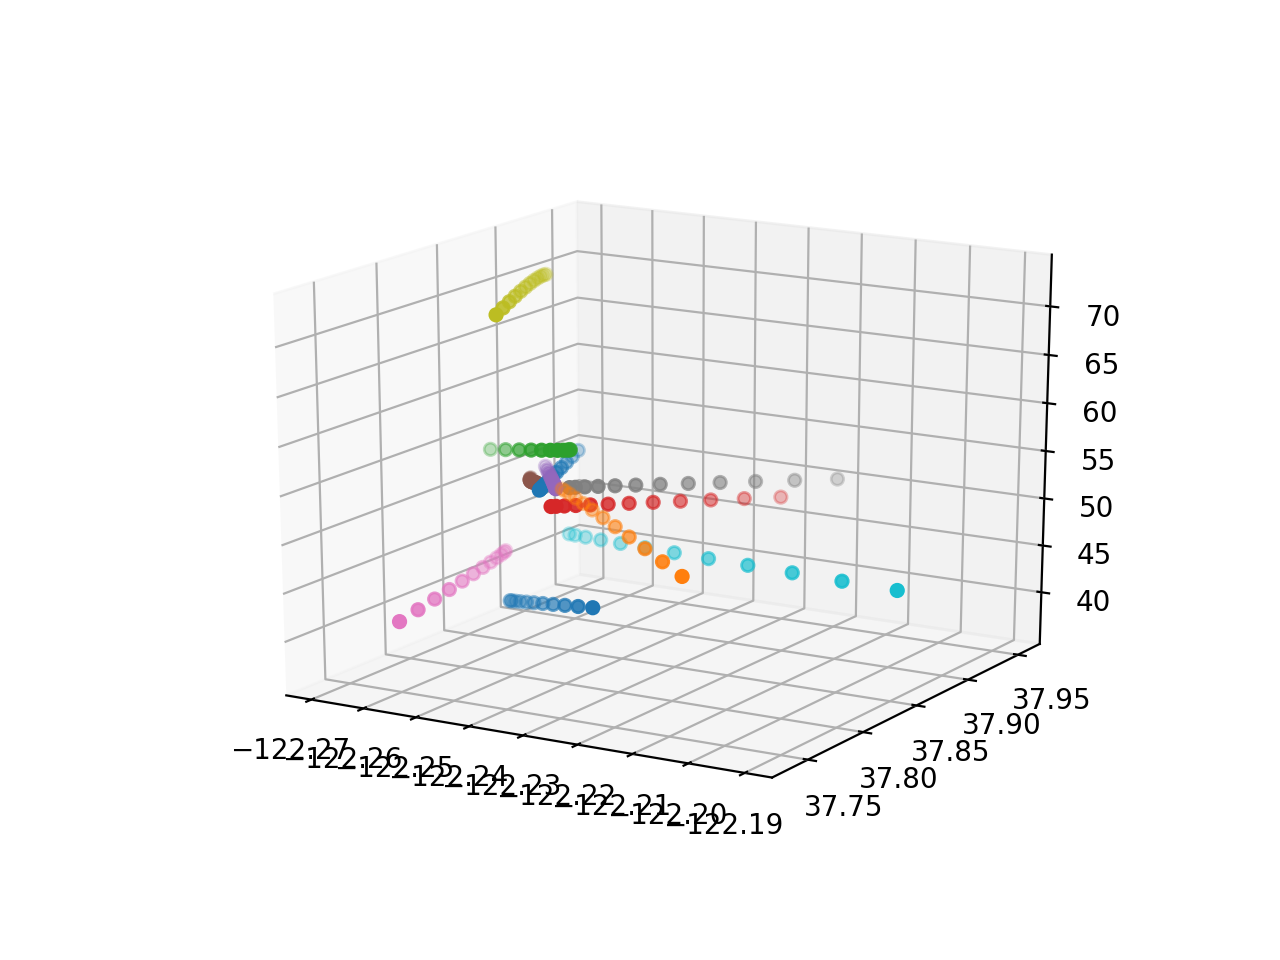

In [97]:
# user id 1-10
fig = plt.figure()
users = [0,1,2,3,4,5,6,7,8,9,10]
ax = plt.axes(projection="3d")
for user in users:
    long, lat, ele = [], [], []
    cur_long = track.loc[user]['longitude']
    cur_lat = track.loc[user]['latitude']
    cur_ele = track.loc[user]['elevation']
    x_speed = track.loc[user]['x_speed']/111111
    y_speed = track.loc[user]['y_speed']/111111
    z_speed = track.loc[user]['z_speed']/111111
    x_acc = track.loc[user]['x_acc']/111111
    y_acc = track.loc[user]['y_acc']/111111
    z_acc = track.loc[user]['z_acc']/111111

    for dur in duration:
        long.append(cur_long + x_speed*dur + 1/2*x_acc*dur**2)
        lat.append(cur_lat + y_speed*dur + 1/2*y_acc*dur**2)
        ele.append(cur_ele + z_speed*dur + 1/2*z_acc*dur**2)

    ax.scatter3D(long, lat, ele, cmap='magma');
    


    
plt.show()

In [62]:
long, lat, ele

([-122.25968354335082,
  -122.25988805494107,
  -122.26022382875958,
  -122.26069086480638,
  -122.26128916308144,
  -122.26201872358477,
  -122.26287954631637,
  -122.26387163127625,
  -122.26499497846439,
  -122.2662495878808,
  -122.26763545952548,
  -122.26915259339843],
 [37.867748708942685,
  37.86940911626401,
  37.872157848208516,
  37.875994904776206,
  37.88092028596708,
  37.886933991781135,
  37.89403602221838,
  37.90222637727881,
  37.91150505696242,
  37.921872061269205,
  37.93332739019919,
  37.945871043752355],
 [49.921285617377045,
  49.92112687953105,
  49.920874854530794,
  49.92052954237628,
  49.92009094306751,
  49.91955905660447,
  49.918933882987176,
  49.918215422215624,
  49.91740367428981,
  49.91649863920973,
  49.9155003169754,
  49.9144087075868])

In [64]:
d = {'time':duration, 'longitude':long, 'latitude':lat, 'elevation':ele}
pd.DataFrame(data=d)

,time,longitude,latitude,elevation
0,5,-122.259684,37.867749,49.921286
1,10,-122.259888,37.869409,49.921127
2,15,-122.260224,37.872158,49.920875
3,20,-122.260691,37.875995,49.920530
4,25,-122.261289,37.880920,49.920091
5,30,-122.262019,37.886934,49.919559
6,35,-122.262880,37.894036,49.918934
7,40,-122.263872,37.902226,49.918215
8,45,-122.264995,37.911505,49.917404
9,50,-122.266250,37.921872,49.916499
